In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.items

<bound method Mapping.items of RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_math

In [2]:
plt.rcParams.update({'figure.figsize':[18,5]})

0
['c' 'False' 'False' 'a' 'False']
1
['False' 'c' 'False' 'b' 'd']
2
['False' 'c' 'False' 'False' 'False']
3
['a' 'False' 'False' 'c' 'False']
4
['False' 'c' 'a' 'd' 'False']
5
['c' 'd' 'c' 'False' 'c']
6
['False' 'a' 'False' 'False' 'False']
7
['False' 'False' 'False' 'c' 'False']
8
['False' 'd' 'c' 'False' 'False']
9
['False' 'False' 'd' 'False' 'a']
10
['c' 'a' 'False' 'a' 'False']
11
['False' 'False' 'False' 'd' 'False']
12
['d' 'False' 'a' 'False' 'b']
13
['False' 'False' 'd' 'b' 'd']
14
['False' 'b' 'b' 'False' 'False']
15
['False' 'd' 'False' 'False' 'False']
16
['False' 'd' 'False' 'b' 'b']
17
['False' 'c' 'c' 'd' 'False']
18
['b' 'd' 'b' 'c' 'False']
19
['False' 'd' 'False' 'False' 'b']
20
['False' 'c' 'False' 'd' 'False']
21
['b' 'c' 'False' 'a' 'False']
22
['False' 'b' 'False' 'False' 'd']
23
['False' 'False' 'b' 'False' 'd']
24
['d' 'False' 'd' 'c' 'a']
25
['c' 'd' 'c' 'False' 'False']
26
['b' 'False' 'c' 'd' 'a']
27
['d' 'False' 'False' 'b' 'False']
28
['False' 'a' 'd' 'a

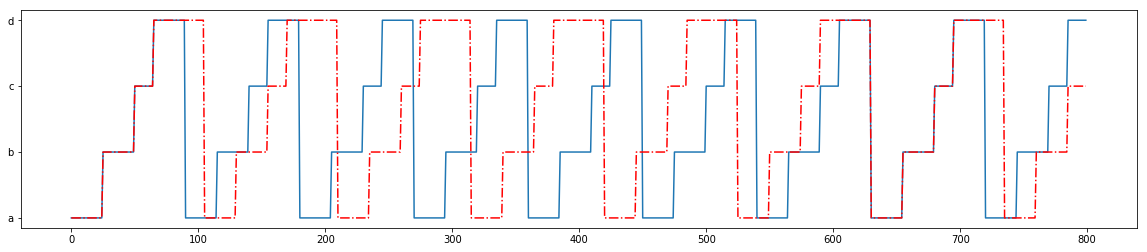

In [16]:
N = 800
alpha = ['a','b','c','d']
gen = generator.Sequence(N, alpha, type = 'test_discret',
                          params={'a': {'len': [25, 25], 'depend_on': False},
                                  'b': {'len': [25, 25], 'depend_on': False},
                                  'c': {'len': [15, 15], 'depend_on': False},
                                  'd': {'len': [25, 25], 'depend_on': False},
                                  'e': {'len': [15, 15], 'depend_on': False}
                                 },
                mean = [0, 0.5, 2, 4, 5] , variance = [0.03, 0.05, 0.1, 0.1, 0.14])

arr_anomal = []

for i in range(200):
    mask = np.random.choice(alpha +[False]*4,5)
#     print(mask)
    arr_anomal += [generator.Sequence(N, alpha, type = 'test_discret',
                      params={'a': {'len': [25, 25], 'depend_on': mask[0]},
                              'b': {'len': [25, 25], 'depend_on': mask[1]},
                              'd': {'len': [40, 40], 'depend_on': mask[2]},
                              'c': {'len': [15, 15], 'depend_on': mask[3]},
                              'e': {'len': [15, 15], 'depend_on': mask[4]}
                             },
                                
            mean = [0, 0.5, 2, 4, 5] , variance = [0.03, 0.05, 0.1, 0.1, 0.14])]
    print(i, sep=' ')
    print(mask)
train_signal = gen.sequence
fig = plt.figure(figsize = (20, 4))

labels = list(map(myutils.rename_state,gen.path))
plt.plot(train_signal)

plt.plot(arr_anomal[0].sequence,'r-.')

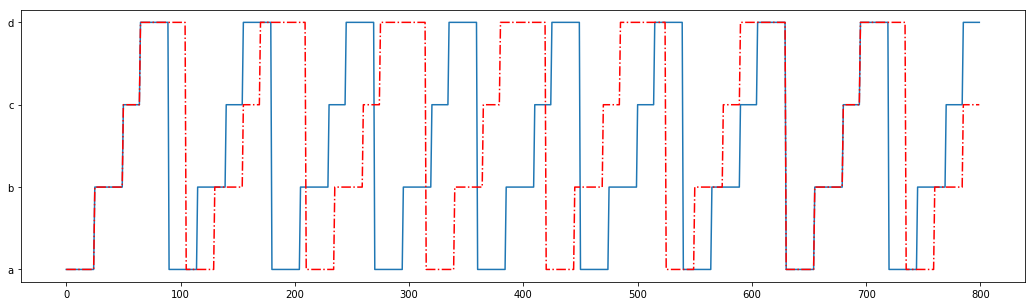

In [4]:
labels = list(map(myutils.rename_state,gen.path))
plt.plot(train_signal)
plt.plot(arr_anomal[0].sequence,'r-.')

In [5]:
# model = HiddenMarkovModel.from_samples(DiscreteDistribution, n_components = 5, X = [signal],
#                                        labels = [labels],algorithm ='labeled')
print(train_signal[0])
model = HiddenMarkovModel.from_samples(DiscreteDistribution, n_components = 5, X = [train_signal])
# model = MarkovChain.from_samples(X = [signal])

a


In [6]:
print(myutils.print_model_distribution(model))

 Состояние  Вероятность испускания
        s0: 'a' = 0.00E+00;    'b' = 0.00E+00;    'c' = 1.72E-104;    'd' = 1.00E+00;    
        s1: 'a' = 6.25E-192;    'b' = 0.00E+00;    'c' = 0.00E+00;    'd' = 1.00E+00;    
        s2: 'a' = 4.99E-212;    'b' = 1.00E+00;    'c' = 5.78E-205;    'd' = 0.00E+00;    
        s3: 'a' = 0.00E+00;    'b' = 5.47E-176;    'c' = 1.00E+00;    'd' = 7.00E-179;    
        s4: 'a' = 1.00E+00;    'b' = 4.25E-211;    'c' = 0.00E+00;    'd' = 7.06E-216;    
None-start: 
  None-end: 
        s0    s1    s2    s3    s4    
s0    9.23E-01  7.73E-02  0.00E+00  0.00E+00  4.99E-47  
s1    3.41E-11  9.23E-01  0.00E+00  0.00E+00  7.73E-02  
s2    0.00E+00  0.00E+00  9.60E-01  4.00E-02  0.00E+00  
s3    6.67E-02  6.30E-20  0.00E+00  9.33E-01  0.00E+00  
s4    0.00E+00  0.00E+00  4.00E-02  0.00E+00  9.60E-01  
       s0      s1      s2      s3      s4
s0  0.923   0.077   0.000   0.000   0.000   
s1  0.000   0.923   0.000   0.000   0.077   
s2  0.000   0.000   0.960   0.

125
Норм -139.33024775706676


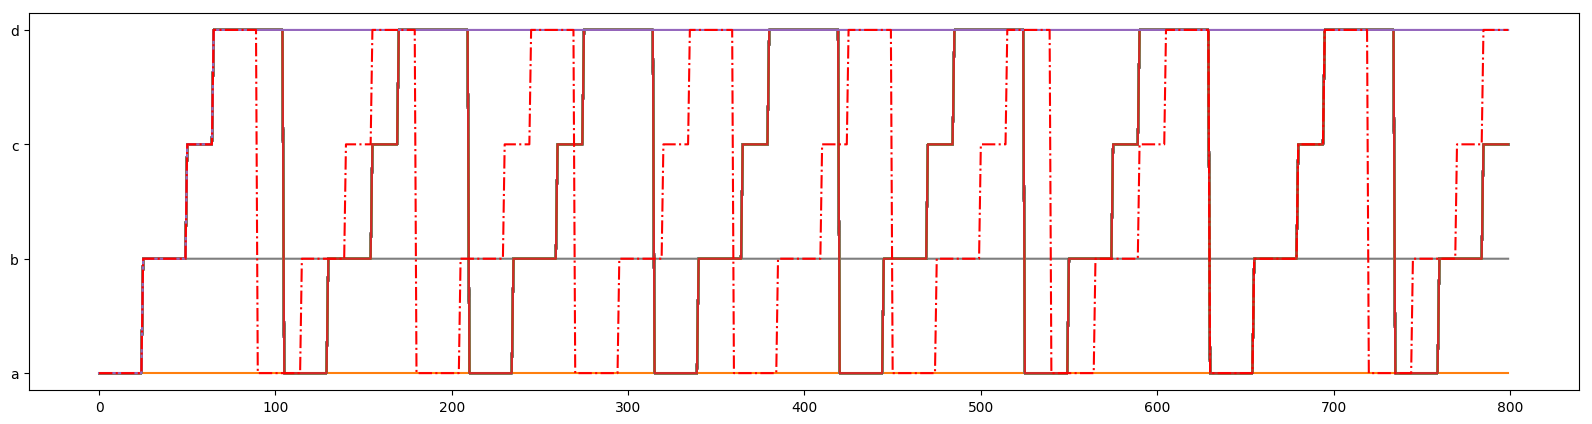

In [7]:
log_norm = model.log_probability(train_signal)
fig = plt.figure(dpi = 100, figsize=(20,5))
count = 0
arr_log = []
numbers = []
for k,signal in enumerate(arr_anomal):
    lp = model.log_probability(signal.sequence)
    arr_log +=[lp]
    if lp > log_norm:
        plt.plot(signal.sequence)
        count+=1
        numbers +=[k]
print(count)
plt.plot(train_signal,'r-.')
print('Норм',model.log_probability(train_signal))

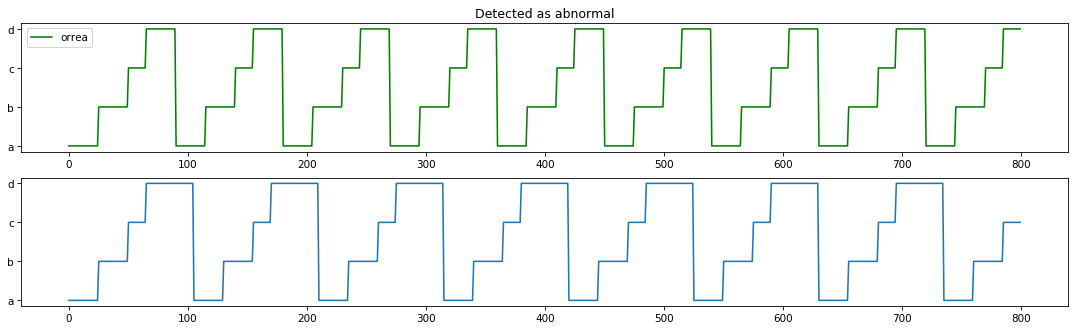

In [8]:
for num in numbers:
    fig, ax = plt.subplots(2,1);
    fig.set_dpi(75)
    ax[0].plot(train_signal,'g',label='orrea')
    ax[1].plot(arr_anomal[num].sequence)
    ax[0].legend()
    ax[0].set_title('Detected as abnormal')

    break
    plt.savefig('1.png');

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SystemError: <built-in method write of _io.BufferedWriter object at 0x7fa6f4130468> returned a result with an error set

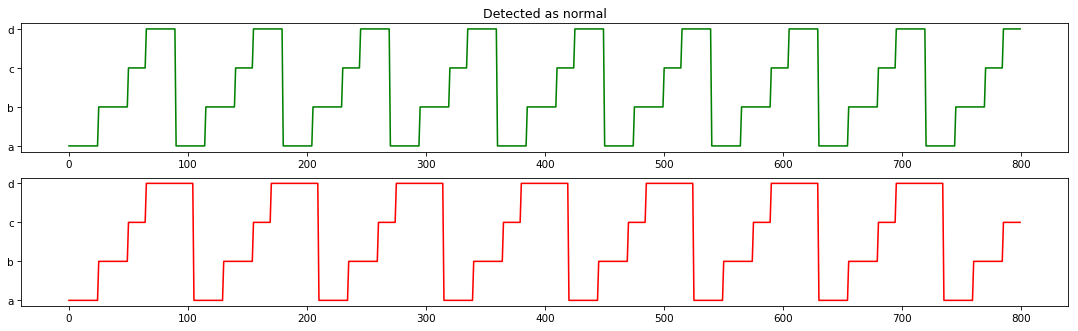

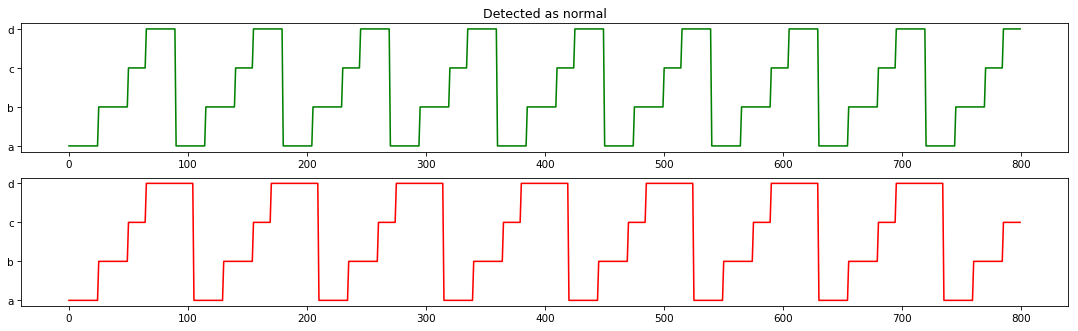

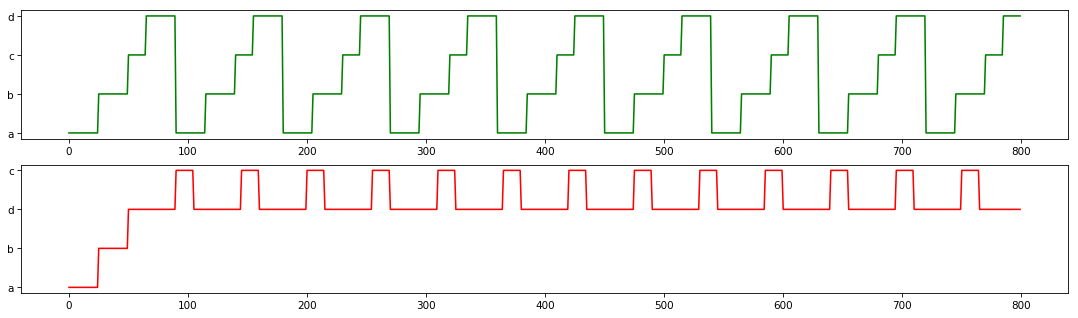

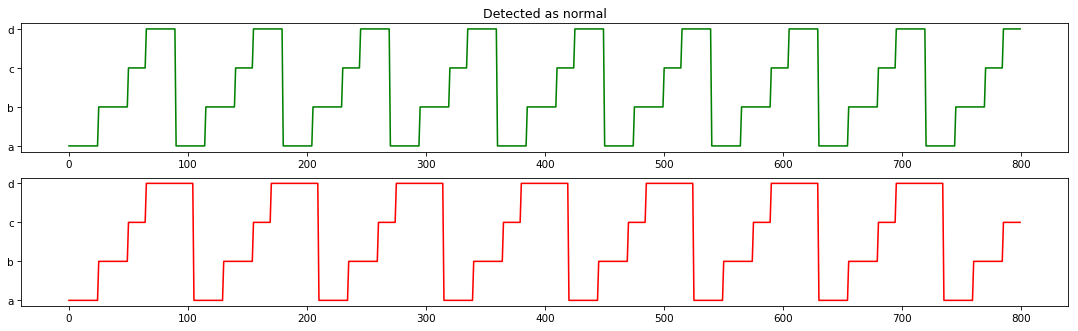

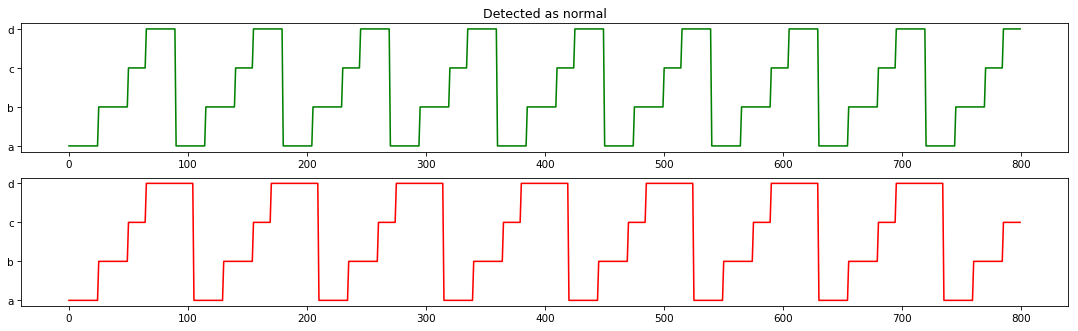

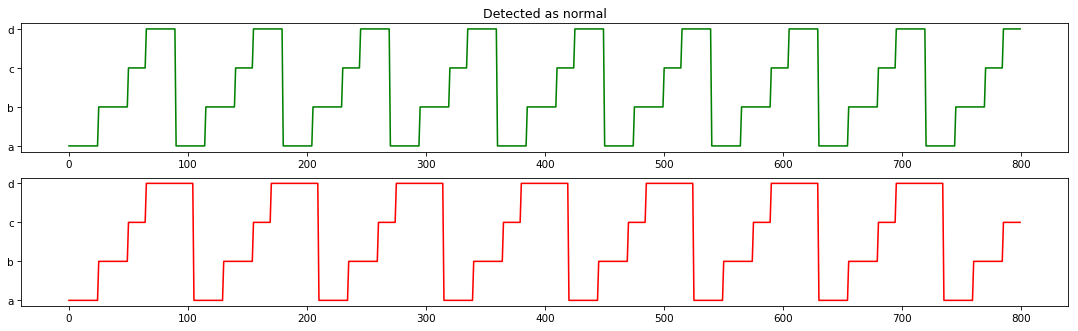

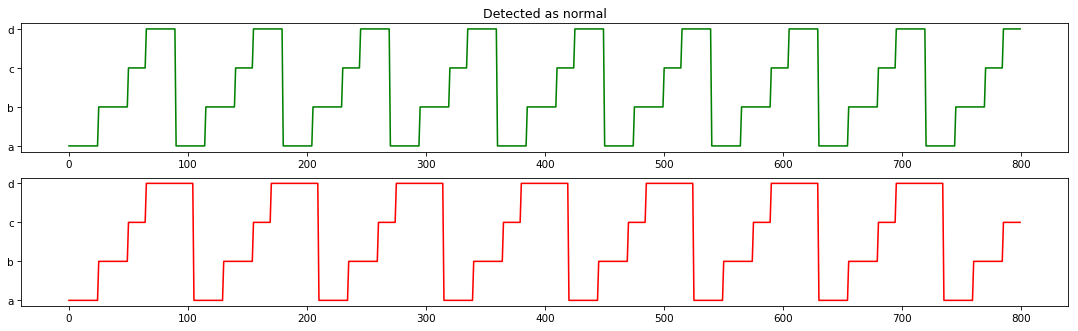

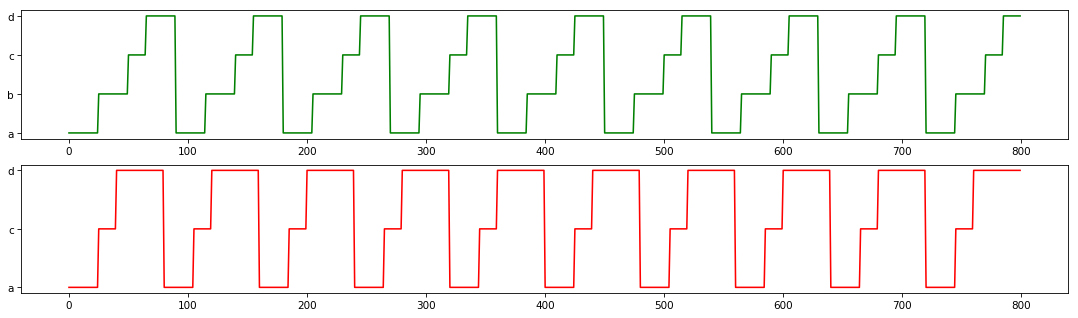

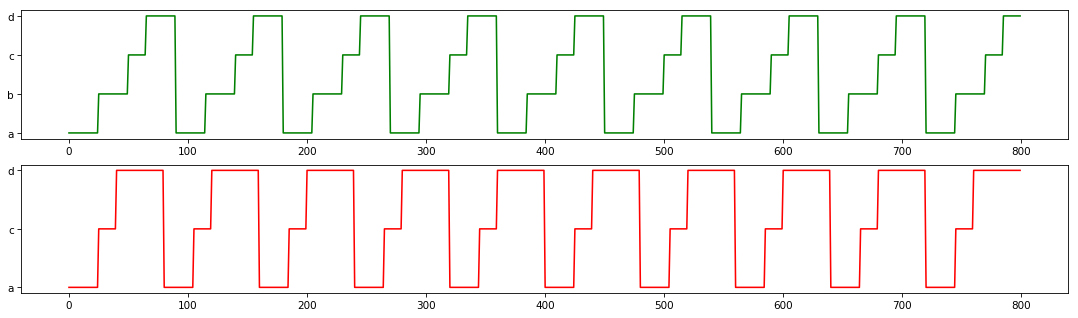

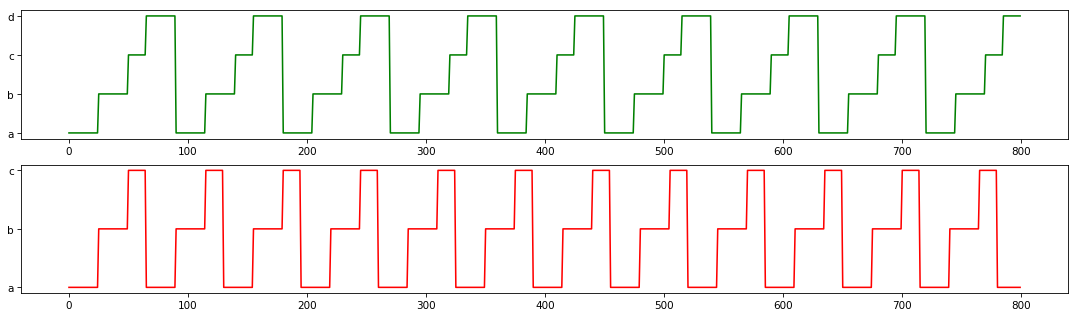

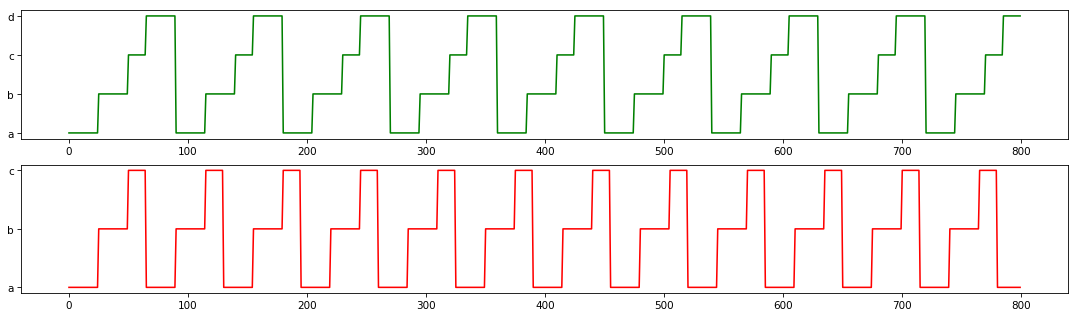

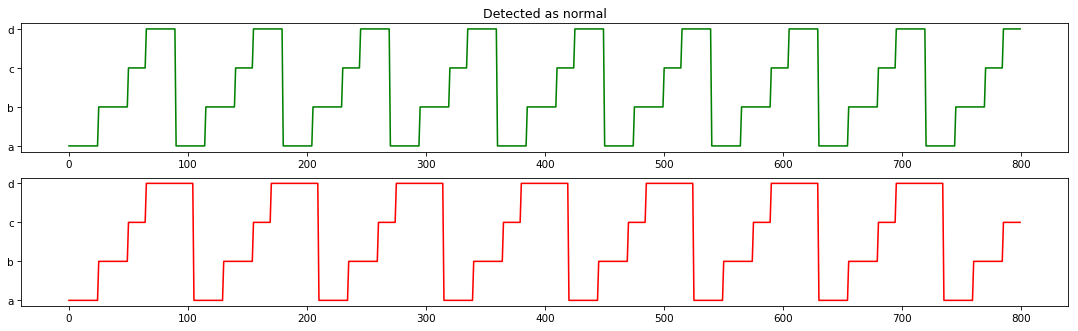

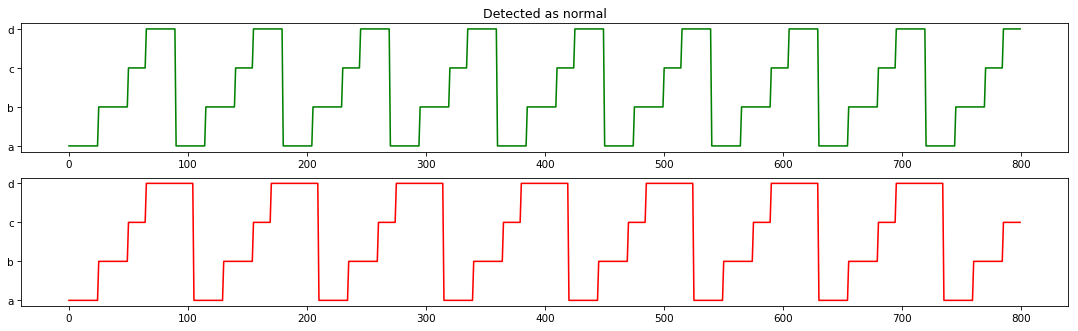

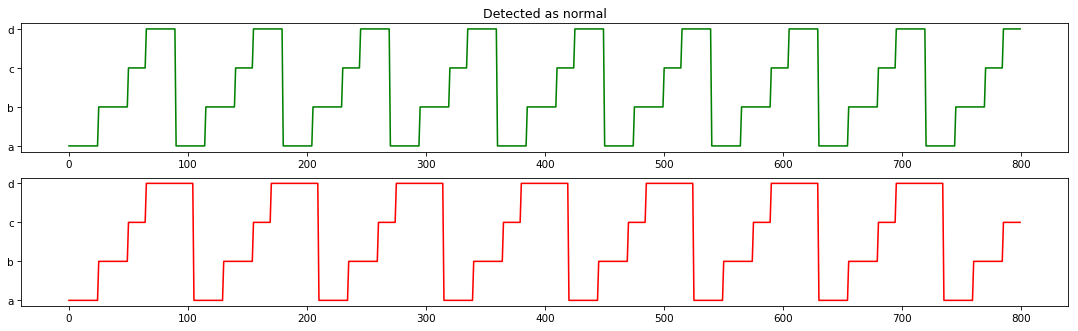

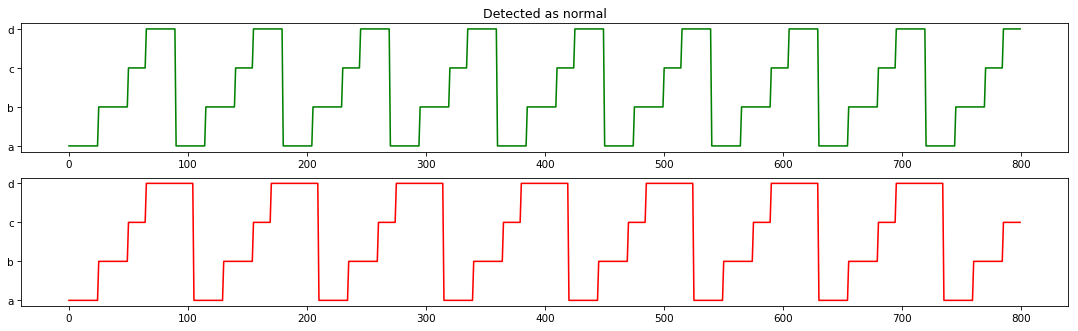

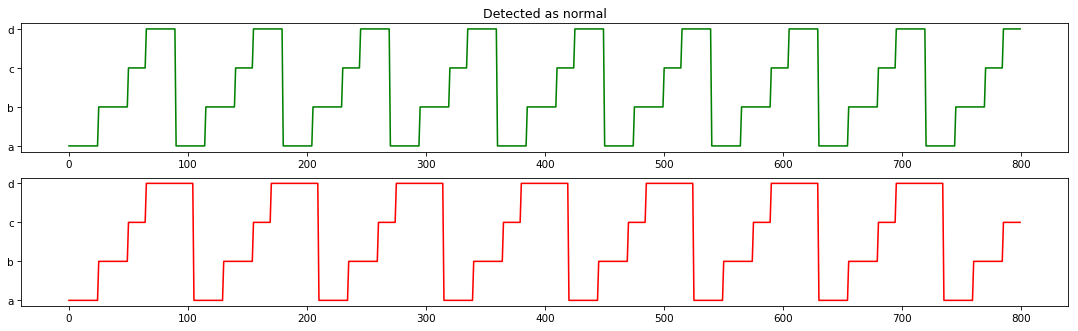

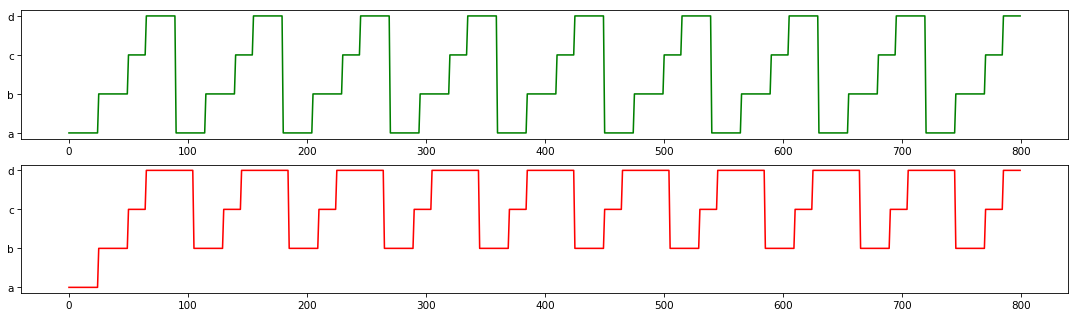

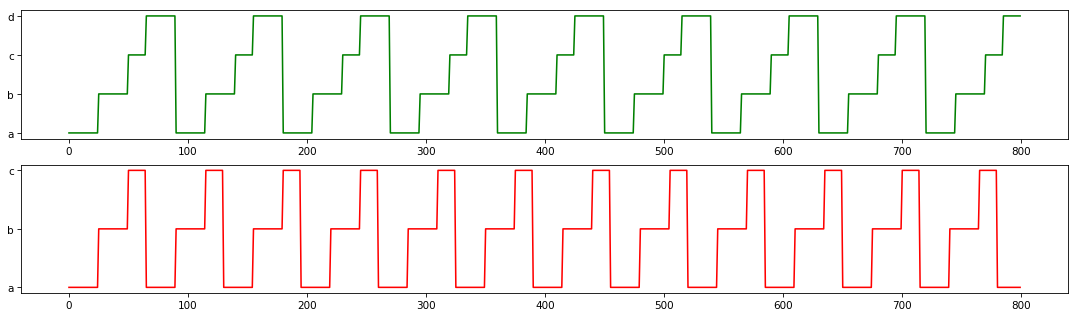

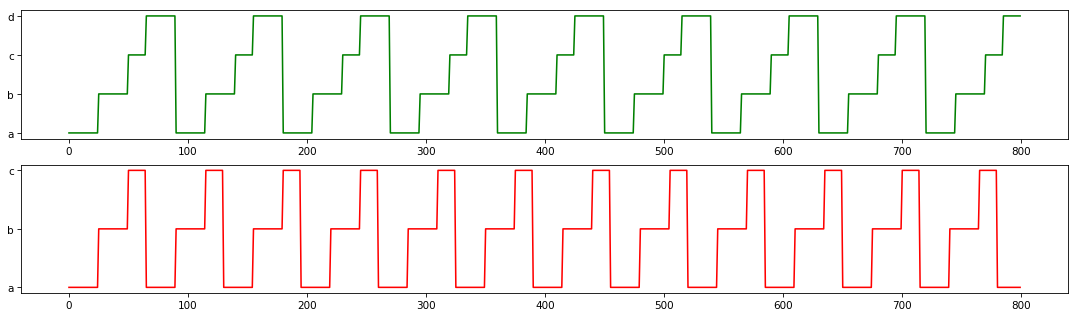

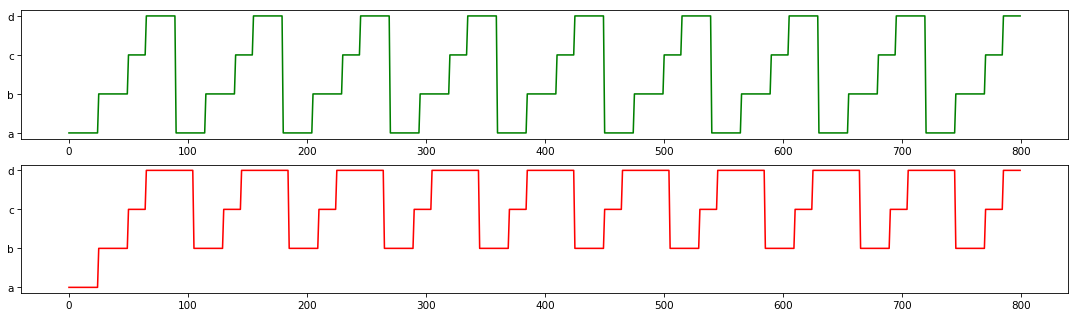

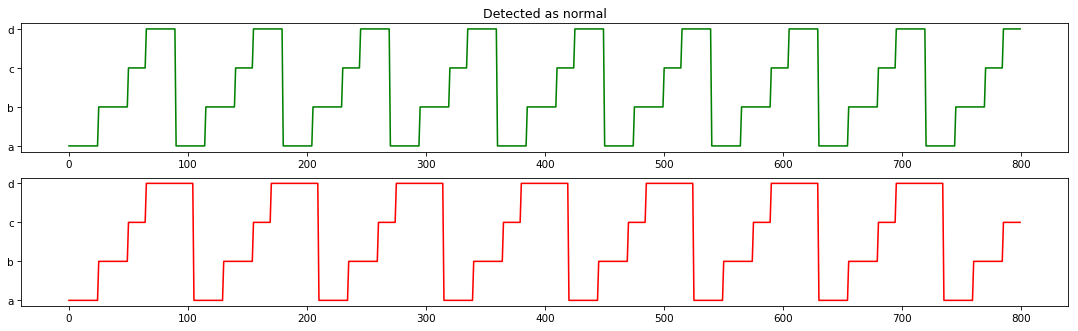

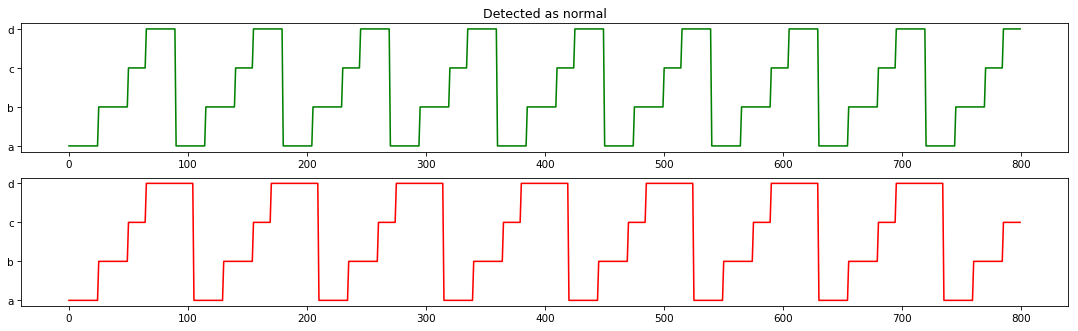

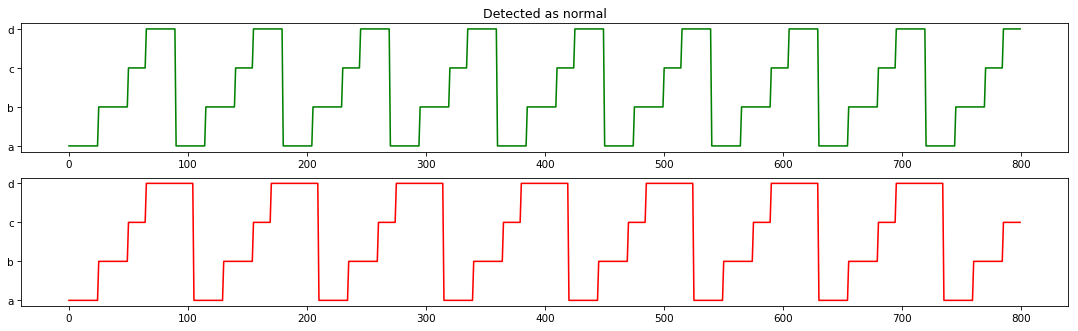

In [ ]:
for k, signal in enumerate(arr_anomal):
    fig, ax = plt.subplots(2,1);
    fig.set_dpi(75)
    if k in numbers:
        ax[0].set_title('Detected as normal')
    ax[0].plot(train_signal,'g',label='Origin')
    ax[1].plot(signal.sequence,'r',label='Abnormal')
    plt.savefig('plot/'+str(k)+'.png');

In [ ]:
plt.plot(arr_log)

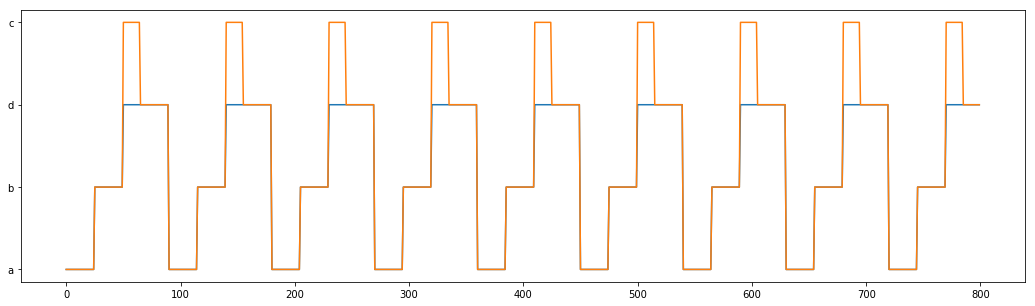

In [13]:
plt.plot(arr_anomal[3].sequence)
plt.plot(train_signal)

TypeError: float() argument must be a string or a number, not 'Sequence'

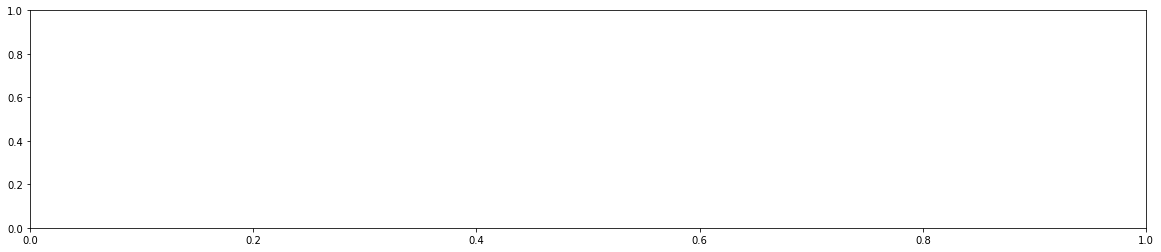

In [19]:
# print('Нормал {}, аномал {}'.format(model.viterbi(train_signal)[0], model.viterbi(anomal)[0]))
fig = plt.figure(figsize = (20, 4))
p = model.viterbi(train_signal)[1]
path = [x[0] for x in p][1:]
plt.plot(signal)
plt.plot(path,'r-.')

In [17]:
forward_prob = model.forward(signal)
print(forward_prob.shape)

TypeError: object of type 'Sequence' has no len()

In [ ]:
path[:5]

In [ ]:
plt.plot(forward_prob)
plt.plot(np.array(path)*15,'r-')

In [ ]:
forward_backward = model.forward_backward(signal)
forward_backward

In [ ]:
plt.plot(forward_backward[0])
plt.plot(np.array(path)*15,'r-')

In [ ]:
print(forward_backward[0], sep='')

In [ ]:
print('Нормал {}, аномал {}'.format(model.log_probability(signal), model.viterbi(signal)[0]))

In [ ]:
pred_ = model.predict(signal, algorithm='viterbi')
plt.plot(z,'g*')
plt.plot(pred_,'r-')

In [ ]:
z = []
for x in forward_prob:
    z +=[np.argmax(x)]

In [ ]:
anomal = generator.Sequence(500, ['d','e','a'], type = 'test_discret',
                          params={'a': {'len': [25, 25], 'depend_on': False},
                                  'b': {'len': [25, 25], 'depend_on': False},
                                  'd': {'len': [45, 45], 'depend_on': False},
                                  'c': {'len': [15, 15], 'depend_on': 'b'},
                                  'e': {'len': [15, 15], 'depend_on': False}
                                 },
                mean = [0, 0.5, 2, 4, 5] , variance = [0.03, 0.05, 0.1, 0.1, 0.14]).sequence
model.log_probability(anomal)

In [ ]:
plt.plot(anomal)

In [ ]:
trans = model.forward(anomal)

In [ ]:
file = open('forward.txt','w')
for rows in trans:
    for el in rows:
        file.write(str(el)+'    ')
    file.write('\n')
file.close()

In [ ]:
model.log_probability(signal)

In [ ]:
model.log_probability(anomal)

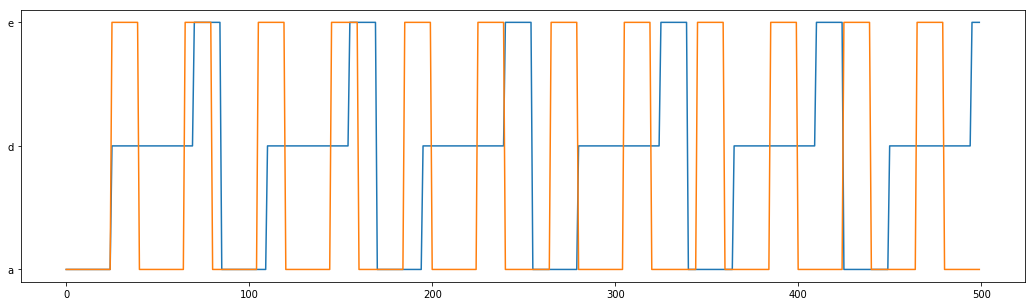

In [16]:
a1 = generator.Sequence(500, ['d','e','a'], type = 'test_discret',
                          params={'a': {'len': [25, 25], 'depend_on': False},
                                  'b': {'len': [25, 25], 'depend_on': False},
                                  'd': {'len': [45, 45], 'depend_on': False},
                                  'c': {'len': [15, 15], 'depend_on': 'b'},
                                  'e': {'len': [15, 15], 'depend_on': False}
                                 },
                mean = [0, 0.5, 2, 4, 5] , variance = [0.03, 0.05, 0.1, 0.1, 0.14]).sequence
a2 = generator.Sequence(500, ['b','e','a'], type = 'test_discret',
                          params={'a': {'len': [25, 25], 'depend_on': 'True'},
                                  'b': {'len': [25, 25], 'depend_on': 'a'},
                                  'd': {'len': [45, 45], 'depend_on': False},
                                  'c': {'len': [15, 15], 'depend_on': 'b'},
                                  'e': {'len': [15, 15], 'depend_on': False}
                                 },
                mean = [0, 0.5, 2, 4, 5] , variance = [0.03, 0.05, 0.1, 0.1, 0.14]).sequence
plt.plot(a1)
plt.plot(a2)

In [17]:
print(a1[:50])
print(a2[:50])

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
